<a href="https://colab.research.google.com/github/Seitenshi/Board-Exam-Data-Test/blob/main/NeuralNetwork_BoardExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Class
class Model(nn.Module):
  #input features = 14
  #hidden layer = 4
  #h1 = 20
  #h2 = 30
  #h3 = 40
  #h4 = 50
  #output layer = 2 (0,1) pass|fail

  def __init__(self, input=14, h1=20, h2=30, h3=40, h4=50, output=2):
    super().__init__() #instantiation
    self.fc1 = nn.Linear(input,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,h4)
    self.out = nn.Linear(h4,output)

  #forwarding of nodes
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.out(x)

    return x

In [3]:
#Manual seed for randomization
torch.manual_seed(69)

#Instantiation
model = Model()

In [4]:
#import pandas and chart maker
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/Seitenshi/Board-Exam-Data-Test/main/BED%20Test%20-%20April.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,Subj01,Subj02,Subj03,Gen. Average,Remarks,YRGRAD,TE,REGION/PROVINCE/CITY,SEX,# OF TAKES CORREL 1,# OF TAKES CORREL 2,# OF TAKES CORREL 3,GRADE IN CORREL 1,GRADE IN CORREL 2,GRADE IN CORREL 3
0,63,83,74,72.85,PASSED,422,2,1.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0
1,67,78,68,70.65,PASSED,1221,2,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
2,71,78,72,73.45,PASSED,122,2,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
3,75,75,67,72.20,PASSED,722,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,70,70,70,70.00,PASSED,722,1,0.0,0.0,NaN,1.0,1.0,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,72,28,42,48.30,FAILED,722,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,70,70,70,70.00,PASSED,520,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,71,74,72,72.25,PASSED,1221,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,56,74,62,63.50,FAILED,1222,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#change the last column from string to int
my_df['Remarks'] = my_df['Remarks'].replace('FAILED',0)
my_df['Remarks'] = my_df['Remarks'].replace('PASSED',1)

# Drop rows with null values
my_df = my_df.dropna()

my_df

,Subj01,Subj02,Subj03,Gen. Average,Remarks,YRGRAD,TE,REGION/PROVINCE/CITY,SEX,# OF TAKES CORREL 1,# OF TAKES CORREL 2,# OF TAKES CORREL 3,GRADE IN CORREL 1,GRADE IN CORREL 2,GRADE IN CORREL 3
1,67,78,68,70.65,1,1221,2,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
2,71,78,72,73.45,1,122,2,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
3,75,75,67,72.20,1,722,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,75,62,51,62.70,0,722,1,1.0,1.0,3.0,2.0,3.0,1.0,1.0,1.5
6,74,77,50,66.50,0,722,1,0.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,79,81,76,78.55,1,722,1,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.5
115,66,69,51,61.65,0,422,2,1.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0
116,78,87,85,83.15,1,722,1,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.5
118,70,70,70,70.00,1,520,2,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.5


In [8]:
#Drop last column of the df
X = my_df.drop('Remarks', axis = 1)
y = my_df['Remarks']

In [9]:
#Change the dataframe X and y as numpy array values
X = X.values
y = y.values

In [10]:
#import scikitlearn for train_test_split
from sklearn.model_selection import train_test_split

In [11]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=69)

In [12]:
#Convert X to float tensors (bc the data from the dataframe is in float or have decimals)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
#Convert y to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#Set Criterion of model to measure the error (how far the predictions are from the data)
criterion = nn.CrossEntropyLoss()

#Optimizer = Adam (Popular)
#lr = learning rate (if the error doesnt go down after a bunch of iteration, lower the lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
#Training the Model
#Epoch is the iteration
epochs = 250
losses = []

for i in range(epochs):
  #Prediction
  y_pred = model.forward(X_train) #-> Predicted results

  #Measure the loss or error
  loss = criterion(y_pred, y_train) #-> pred value vs train data

  #Tracking the losses
  losses.append(loss.detach().numpy())

  #Printing the epoch by 10
  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

  #Back Propagation - take the error rate and feed it back to the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 2.447995901107788
Epoch 10 and loss 0.6300863027572632
Epoch 20 and loss 0.5647910833358765
Epoch 30 and loss 0.4770980775356293
Epoch 40 and loss 0.4210798740386963
Epoch 50 and loss 0.31084445118904114
Epoch 60 and loss 0.2930995523929596
Epoch 70 and loss 0.241936594247818
Epoch 80 and loss 0.14201977849006653
Epoch 90 and loss 0.28599053621292114
Epoch 100 and loss 0.12506406009197235
Epoch 110 and loss 0.12395279854536057
Epoch 120 and loss 0.0794520154595375
Epoch 130 and loss 0.05906956270337105
Epoch 140 and loss 0.2567228376865387
Epoch 150 and loss 0.13721007108688354
Epoch 160 and loss 0.07329612970352173
Epoch 170 and loss 0.21877624094486237
Epoch 180 and loss 0.21080704033374786
Epoch 190 and loss 0.23795604705810547
Epoch 200 and loss 0.2166987508535385
Epoch 210 and loss 0.05507957935333252
Epoch 220 and loss 0.009288804605603218
Epoch 230 and loss 0.0031822528690099716
Epoch 240 and loss 0.0010654398938640952


Text(0.5, 0, 'epoch')

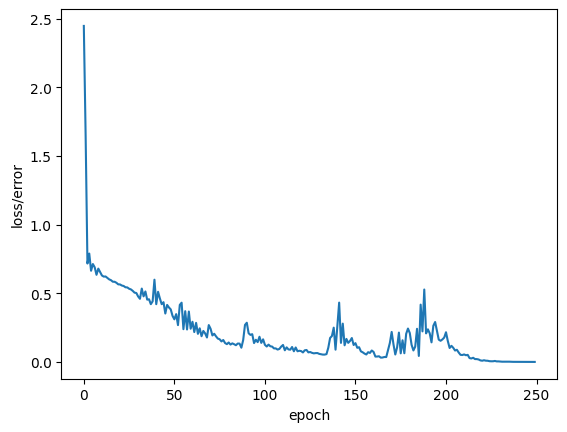

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')

In [17]:
#Evaluation of Model (test)
with torch.no_grad(): #Turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [18]:
loss

tensor(0.0339)

In [19]:
#Checking if the model predicts properly
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    #Semi Predictions
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #Checking if correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'No of correct items: {correct}')

1.) tensor([ 5.7724, -4.4663]) 	 0 	 0
2.) tensor([ 8.6085, -6.9507]) 	 0 	 0
3.) tensor([-3.0988,  3.4476]) 	 1 	 1
4.) tensor([-7.4874,  7.5745]) 	 1 	 1
5.) tensor([-5.8478,  5.7681]) 	 1 	 1
6.) tensor([ 5.7768, -4.6387]) 	 0 	 0
7.) tensor([ 23.9626, -18.9964]) 	 0 	 0
8.) tensor([ 5.5451, -4.4456]) 	 0 	 0
9.) tensor([-7.2594,  8.8582]) 	 1 	 1
10.) tensor([-5.5177,  5.4856]) 	 1 	 1
11.) tensor([ 3.7124, -2.8223]) 	 0 	 0
12.) tensor([ 17.4971, -13.9571]) 	 0 	 0
13.) tensor([-7.3100,  7.9017]) 	 1 	 1
14.) tensor([0.0726, 0.2509]) 	 1 	 1
15.) tensor([-7.8307,  8.0117]) 	 1 	 1
16.) tensor([-12.6613,  13.5632]) 	 1 	 1
17.) tensor([ 6.3228, -4.9568]) 	 0 	 0
18.) tensor([-14.3055,  15.4575]) 	 1 	 1
No of correct items: 18
